<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn_lvq import GlvqModel
from sklearn_lvq.utils import plot2d

In [111]:
df    = pd.read_csv('cluster.csv')
X = df[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11']].to_numpy()
X = df[['x1','x2']].to_numpy()

#Normalizing the data
#sc = StandardScaler()
#X = sc.fit_transform(X)
#y = sc.fit_transform(Y)

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=0.7, random_state=5)

# **K-means**


In [ ]:
for c in [2,3,4,5,10,20,25,29]:
  k_means = KMeans(init='k-means++', n_clusters=c, n_init=10) # otro es MiniBatchKMeans
  t0 = time.time()
  k_means = k_means.fit(X_train)
  t_batch = time.time() - t0

  #k_means.predict([[4,8,20,40,74,80,77,40,22,8,3], [4,8,20,40,74,80,77,40,22,8,3]])
  k_means.predict(X_test)

  values = k_means.cluster_centers_.squeeze()
  labels = k_means.labels_
  #print("Centroides",k_means.cluster_centers_)
  print(labels)
  print('Exactitud:', k_means.score(X_test))

# **LVQ**

In [ ]:
pip install sklearn-lvq

GLVQ:
not implemented!
classification accuracy: 0.0


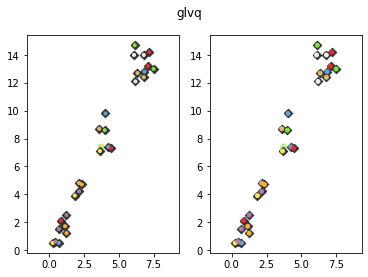

In [125]:
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_rslvq.html
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/index.html
#https://mrnuggelz.github.io/sklearn-lvq/modules/generated/sklearn_lvq.GlvqModel.html#sklearn_lvq.GlvqModel
print('GLVQ:')
#nb_ppc = 100
#toy_data = np.append(
#    np.random.multivariate_normal([0, 0], np.eye(2) / 2, size=nb_ppc),
#    np.random.multivariate_normal([5, 0], np.eye(2) / 2, size=nb_ppc), axis=0)
#toy_label = np.append(np.zeros(nb_ppc), np.ones(nb_ppc), axis=0)

glvq = GlvqModel()
glvq.fit(X_train, labels)
plot2d(glvq, values, labels, 1, 'glvq')

print('classification accuracy:', glvq.score(values, labels))
plt.show()